<a href="https://colab.research.google.com/github/utamiu1807/-utami-creditcardclustering/blob/main/Utami_Heinz_Real_Estate_Regression_Lab_2026_Spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
from google.colab import drive
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

For a guide to running Google Colab on your local machine see https://research.google.com/colaboratory/local-runtimes.html

## Read Dataset

In [2]:
data = pd.read_csv('https://www.dropbox.com/scl/fi/yis5zpl35tyn2r3z4d7uf/real_estate_market_data.csv?rlkey=oa1106yj6knt6w1oufogdpequ&st=571k3go0&dl=1')

data

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,NaN,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2825,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2826,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2827,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2006,WD,Normal,170000,-93.600190,41.990921


## Explore Data

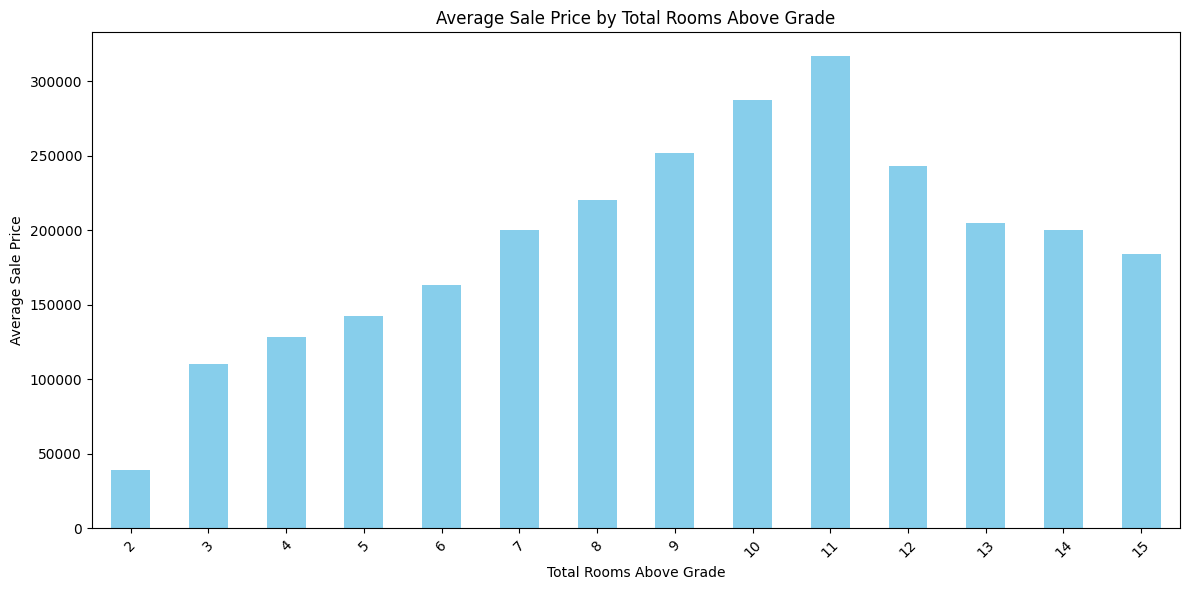

In [3]:
# Calculate the average sale price by TotRms_AbvGrd
avg_price_by_rooms = data.groupby('TotRms_AbvGrd')['Sale_Price'].mean().sort_index()

# Plot the bar graph
plt.figure(figsize=(12, 6))
avg_price_by_rooms.plot(kind='bar', color='skyblue')
plt.title('Average Sale Price by Total Rooms Above Grade')
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [4]:
data['Bldg_Type'].unique()
# data['Neighborhood'].unique()

array(['OneFam', 'TwnhsE', 'Twnhs', 'Duplex', 'TwoFmCon'], dtype=object)

## Run Linear Regression

In [5]:
  # Specify features and target variable
# features = ['Gr_Liv_Area', 'TotRms_AbvGrd', 'Bldg_Type']
features = ['TotRms_AbvGrd', 'Bldg_Type']
# features = ['Neighborhood', 'Gr_Liv_Area', 'TotRms_AbvGrd', 'Bldg_Type']

X = pd.get_dummies(data[features], drop_first=True, dtype=int)  # Handle categorical variables with dummy encoding

# y = np.log(data['Sale_Price'])
y = data['Sale_Price']

X

,TotRms_AbvGrd,Bldg_Type_OneFam,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,Bldg_Type_TwoFmCon
0,7,1,0,0,0
1,5,1,0,0,0
2,6,1,0,0,0
3,8,1,0,0,0
4,6,1,0,0,0
...,...,...,...,...,...
2824,6,1,0,0,0
2825,5,1,0,0,0
2826,6,1,0,0,0
2827,6,1,0,0,0


In [6]:
# Add a constant to the features (intercept term)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     277.4
Date:                Thu, 05 Feb 2026   Prob (F-statistic):          7.36e-242
Time:                        16:13:44   Log-Likelihood:                -35388.
No. Observations:                2829   AIC:                         7.079e+04
Df Residuals:                    2823   BIC:                         7.082e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.358e+04   9203

In [7]:
# Print coefficients formatted manually without scientific notation
coef_df = pd.DataFrame({
    'Coef': model.params,
    'Std Err': model.bse,
    't': model.tvalues,
    'P>|t|': model.pvalues,
    '[0.025': model.conf_int()[0],
    '0.975]': model.conf_int()[1]
})

# Print the DataFrame without scientific notation
print(coef_df.to_string(float_format='{:,.4f}'.format))

                           Coef     Std Err        t  P>|t|        [0.025       0.975]
const              -93,580.3058  9,203.6603 -10.1677 0.0000 -111,626.8859 -75,533.7257
TotRms_AbvGrd       29,085.7385    825.6938  35.2258 0.0000   27,466.7142  30,704.7628
Bldg_Type_OneFam    88,973.2839  6,659.7726  13.3598 0.0000   75,914.7706 102,031.7971
Bldg_Type_Twnhs     74,574.2308  9,446.3041   7.8945 0.0000   56,051.8736  93,096.5880
Bldg_Type_TwnhsE   133,546.5529  8,096.0890  16.4952 0.0000  117,671.7038 149,421.4020
Bldg_Type_TwoFmCon  10,401.4728 10,527.4423   0.9880 0.3232  -10,240.7853  31,043.7308


## Run Single Decision Tree

In [8]:
# Specify features and target variable
features = ['Neighborhood', 'Gr_Liv_Area', 'TotRms_AbvGrd', 'Bldg_Type']
X = pd.get_dummies(data[features], drop_first=True)  # Handle categorical variables with one-hot encoding
y = data['Sale_Price']

# Fit a decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, y)

# Make predictions
tree_predictions = tree_model.predict(X)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y, tree_predictions))
mae = mean_absolute_error(y, tree_predictions)
mape = np.mean(np.abs((y - tree_predictions) / y)) * 100  # Mean Absolute Percentage Error
r2 = r2_score(y, tree_predictions)

# Print the evaluation metrics
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

RMSE: 5553.2301
MAE: 1619.7871
MAPE: 1.1518%
R-squared: 0.9952


## Run Random Forest

In [52]:
#featureengineering
data['Total_Bathrooms'] = (data['Full_Bath'] + 0.5 * data['Half_Bath'])

data['House_Age'] = data['Year_Sold'] - data['Year_Built']
data['Total_SF'] = (data['Gr_Liv_Area'] + data['Total_Bsmt_SF']) #Total Square Footage


In [54]:
# Specify features and target variable
features = ['Neighborhood', 'Gr_Liv_Area', 'TotRms_AbvGrd', 'Bldg_Type', 'Total_Bathrooms', 'House_Age', 'Total_SF', 'Lot_Shape']
X = pd.get_dummies(data[features], drop_first=True)
y = y = np.log(data['Sale_Price'])  #change the log sale price



# X = pd.get_dummies(data.drop(columns=['Sale_Price']), drop_first=True)
# y = data['Sale_Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a random forest model
# https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
# rf_model = DecisionTreeRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
mae = mean_absolute_error(y_test, rf_predictions)
mape = np.mean(np.abs((y_test - rf_predictions) / y_test)) * 100  # Mean Absolute Percentage Error
r2 = r2_score(y_test, rf_predictions)

# Print the evaluation metrics
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

RMSE: 0.1644
MAE: 0.1092
MAPE: 0.9158%
R-squared: 0.8337


## Feature Importance for Random Forest

                                Feature  Importance
4                              Total_SF    0.661272
3                             House_Age    0.187741
0                           Gr_Liv_Area    0.058312
32                     Bldg_Type_OneFam    0.012952
1                         TotRms_AbvGrd    0.012116
2                       Total_Bathrooms    0.011127
11                 Neighborhood_Edwards    0.007221
24                Neighborhood_Old_Town    0.006654
10                Neighborhood_Crawford    0.005574
15  Neighborhood_Iowa_DOT_and_Rail_Road    0.004293
37                    Lot_Shape_Regular    0.003260
38         Lot_Shape_Slightly_Irregular    0.002676
19              Neighborhood_North_Ames    0.002277
18                Neighborhood_Mitchell    0.002103
27                Neighborhood_Somerset    0.001860
17          Neighborhood_Meadow_Village    0.001843
9            Neighborhood_College_Creek    0.001673
22      Neighborhood_Northridge_Heights    0.001591
7           

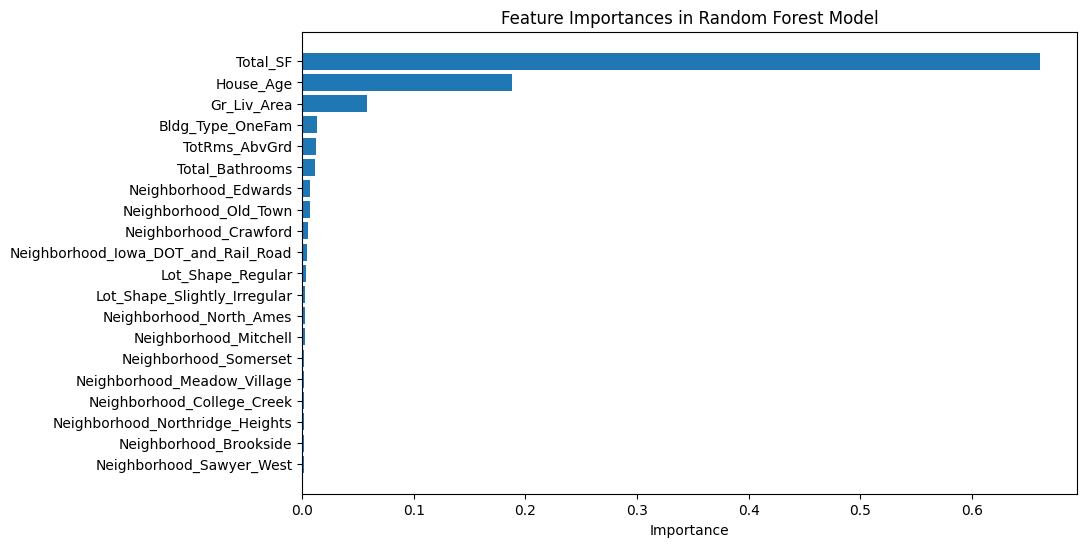

In [55]:
# Print feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df = importances_df.head(20)

# Display the feature importances
print(importances_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()

what you can do more/; shaping values, build small model and xxx. dont just stop at feature importance.nIf you want to dig deeper, in neural networks. mechanistic interpretability (try itt)

## Tuning Parameters for Random Forest

try, 300 to none, try to 500 to none, try to 800 to none, try to 300 to 0...

In [51]:
# Specify the parameter grid to search over
param_grid = {
    'n_estimators': [300, 500, 800],
    'max_depth': [None, 10],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': [None, 'sqrt', 'log2'],
    # 'bootstrap': [True, False]
}

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    scoring='r2',  # Metric to optimize
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best R-squared score: ", grid_search.best_score_)

# Use the best estimator for predictions
best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


KeyboardInterrupt: 


Example Output from Above
```
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best R-squared score:  0.7997852240892972


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R-squared score:  0.8696042325230664

Time: 2:28 running locally
Time: 6:48 running on cloud
```



## Make Predictions on Unseen Data

In [12]:
predictions = pd.read_csv('https://www.dropbox.com/scl/fi/aol0myehwcdo093zvu0j5/real_estate_predictions.csv?rlkey=uhap0mzv2bnra08hocn96ezrz&st=88j2x1g4&dl=1')

predictions

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_PUD_1946_and_Newer,Residential_Medium_Density,35,3907,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,...,No_Fence,NaN,0,4,2010,WD,Normal,NaN,-93.645701,42.009345
1,One_Story_PUD_1946_and_Newer,Residential_Medium_Density,35,3907,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,...,No_Fence,NaN,0,3,2010,WD,Normal,NaN,-93.645729,42.009337
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,100,15602,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Good_Wood,NaN,0,3,2010,WD,Normal,NaN,-93.641677,42.010797
3,One_and_Half_Story_Finished_All_Ages,Residential_Medium_Density,40,5436,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,5,2010,WD,Normal,NaN,-93.625291,42.022772
4,One_Story_1945_and_Older,Residential_Medium_Density,58,8154,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2010,ConLw,Normal,NaN,-93.629496,42.021414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8750,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,8,2009,WD,Normal,NaN,-93.626554,42.054626
96,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,61,7930,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2009,WD,Normal,NaN,-93.628707,42.055228
97,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,7830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,3,2009,COD,Normal,NaN,-93.626603,42.055184
98,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8510,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2009,WD,Normal,NaN,-93.626550,42.055154


In [13]:
predictions['Sale_Price'] = data['Sale_Price'].mean()

predictions

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_PUD_1946_and_Newer,Residential_Medium_Density,35,3907,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,...,No_Fence,NaN,0,4,2010,WD,Normal,180599.798515,-93.645701,42.009345
1,One_Story_PUD_1946_and_Newer,Residential_Medium_Density,35,3907,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,...,No_Fence,NaN,0,3,2010,WD,Normal,180599.798515,-93.645729,42.009337
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,100,15602,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Good_Wood,NaN,0,3,2010,WD,Normal,180599.798515,-93.641677,42.010797
3,One_and_Half_Story_Finished_All_Ages,Residential_Medium_Density,40,5436,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,5,2010,WD,Normal,180599.798515,-93.625291,42.022772
4,One_Story_1945_and_Older,Residential_Medium_Density,58,8154,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2010,ConLw,Normal,180599.798515,-93.629496,42.021414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8750,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,8,2009,WD,Normal,180599.798515,-93.626554,42.054626
96,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,61,7930,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2009,WD,Normal,180599.798515,-93.628707,42.055228
97,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,7830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,3,2009,COD,Normal,180599.798515,-93.626603,42.055184
98,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8510,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2009,WD,Normal,180599.798515,-93.626550,42.055154


In [14]:
predictions[features]

,Neighborhood,Gr_Liv_Area,TotRms_AbvGrd,Bldg_Type
0,Blueste,1034,4,TwnhsE
1,Blueste,1191,5,TwnhsE
2,Crawford,1801,6,OneFam
3,Iowa_DOT_and_Rail_Road,1154,7,OneFam
4,Iowa_DOT_and_Rail_Road,540,4,OneFam
...,...,...,...,...
95,North_Ames,1002,5,OneFam
96,North_Ames,1026,5,OneFam
97,North_Ames,1180,6,OneFam
98,North_Ames,1050,6,OneFam


In [15]:
X_pred = pd.get_dummies(predictions[features], drop_first=True)

training_features = X.columns

X_pred = X_pred.reindex(columns=training_features, fill_value=0)

X_pred

,Gr_Liv_Area,TotRms_AbvGrd,Neighborhood_Blueste,Neighborhood_Briardale,Neighborhood_Brookside,Neighborhood_Clear_Creek,Neighborhood_College_Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,...,Neighborhood_Sawyer_West,Neighborhood_Somerset,Neighborhood_South_and_West_of_Iowa_State_University,Neighborhood_Stone_Brook,Neighborhood_Timberland,Neighborhood_Veenker,Bldg_Type_OneFam,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,Bldg_Type_TwoFmCon
0,1034,4,0,0,0,0,0,False,0,False,...,0,False,0,False,False,0,False,False,True,0
1,1191,5,0,0,0,0,0,False,0,False,...,0,False,0,False,False,0,False,False,True,0
2,1801,6,0,0,0,0,0,True,0,False,...,0,False,0,False,False,0,True,False,False,0
3,1154,7,0,0,0,0,0,False,0,False,...,0,False,0,False,False,0,True,False,False,0
4,540,4,0,0,0,0,0,False,0,False,...,0,False,0,False,False,0,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1002,5,0,0,0,0,0,False,0,False,...,0,False,0,False,False,0,True,False,False,0
96,1026,5,0,0,0,0,0,False,0,False,...,0,False,0,False,False,0,True,False,False,0
97,1180,6,0,0,0,0,0,False,0,False,...,0,False,0,False,False,0,True,False,False,0
98,1050,6,0,0,0,0,0,False,0,False,...,0,False,0,False,False,0,True,False,False,0


In [16]:
# Change best_rf_model below to rf_model to use your Random Forest Model from above

predictions["Sale_Price"] = best_rf_model.predict(X_pred)

predictions

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_PUD_1946_and_Newer,Residential_Medium_Density,35,3907,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,...,No_Fence,NaN,0,4,2010,WD,Normal,151346.874815,-93.645701,42.009345
1,One_Story_PUD_1946_and_Newer,Residential_Medium_Density,35,3907,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,...,No_Fence,NaN,0,3,2010,WD,Normal,165951.721667,-93.645729,42.009337
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,100,15602,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Good_Wood,NaN,0,3,2010,WD,Normal,222687.213333,-93.641677,42.010797
3,One_and_Half_Story_Finished_All_Ages,Residential_Medium_Density,40,5436,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,5,2010,WD,Normal,119379.607937,-93.625291,42.022772
4,One_Story_1945_and_Older,Residential_Medium_Density,58,8154,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2010,ConLw,Normal,57041.247778,-93.629496,42.021414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8750,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,8,2009,WD,Normal,146716.438889,-93.626554,42.054626
96,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,61,7930,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2009,WD,Normal,145370.416667,-93.628707,42.055228
97,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,7830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,3,2009,COD,Normal,138186.388889,-93.626603,42.055184
98,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8510,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2009,WD,Normal,143437.666667,-93.626550,42.055154


In [17]:
predictions.to_csv('team_predictions.csv', index=False)
files.download('team_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Add your predictions to the sheet below

### Heinz ML Foundations Students


[Link to Prediction Submissions](https://docs.google.com/spreadsheets/d/11st1j8Eg1cl3AKfT3ppbGaIdyMc-3ULnkLU1LsQndtk/edit?usp=sharing)